# Pymaceuticals Inc.
---

### Analysis

- Number of time stamped observations across each drug regimen was relatively equal. Capomulin had highest count while Proprovia had the lowest count.


- A positive correlation between mouse weight and tumor weight with Capomulin regiment.


- Although I was not able to produce the box plots, based on the results provided, Capomulin and Ramicane show the lowest tumor volume across drug regimes. Conclusion is therefore that Capomulin and Ramicane are the most effective drug regmines in this study. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
pymaceuticals_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(pd.unique(mouse_metadata['Mouse ID']))
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pymaceuticals_complete.loc[pymaceuticals_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouseg989 = pymaceuticals_complete.loc[pymaceuticals_complete['Mouse ID'] == 'g989',:]
Mouseg989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_clean = pymaceuticals_complete.drop(pymaceuticals_complete[pymaceuticals_complete['Mouse ID'] == 'g989'].index)
pymaceuticals_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(pd.unique(pymaceuticals_clean['Mouse ID']))
mice_count_clean

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

#summary_df = pymaceuticals_clean.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
#tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
#tumor_median = summary_df['Tumor Volume (mm3)'].median()
#tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
#tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
#summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   #'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

#summary_grouped_df.head()
#The above method does not produce a series of warnings errors for numeric calcuations.

#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = pymaceuticals_clean.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = pymaceuticals_clean.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = pymaceuticals_clean.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = pymaceuticals_clean.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = pymaceuticals_clean.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                             "Median Tumor Volume":regimen_median, 
                             "Tumor Volume Variance":regimen_variance, 
                             "Tumor Volume Std. Dev.": regimen_std, 
                             "Tumor Volume Std. Err.": regimen_sem
                             })

summary_table




C:\Users\justi\AppData\Local\Temp\ipykernel_5636\3269993294.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_mean = pymaceuticals_clean.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
C:\Users\justi\AppData\Local\Temp\ipykernel_5636\3269993294.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_median = pymaceuticals_clean.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
C:\Users\justi\AppData\Local\Temp\ipykernel_5636\3269993294.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to F

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_2 = pymaceuticals_clean.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

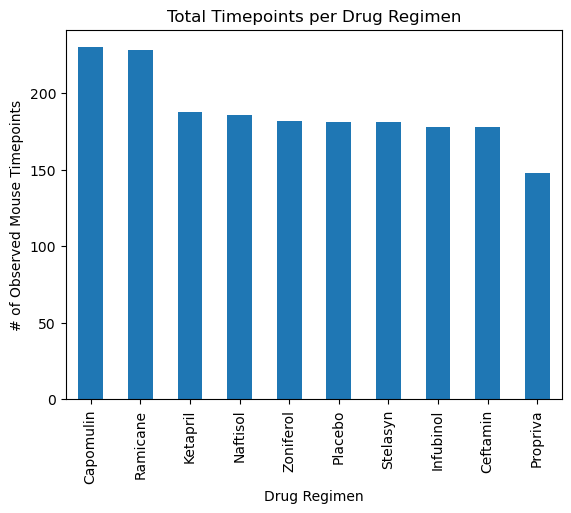

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_bar = pymaceuticals_clean['Drug Regimen'].value_counts()
regimen_bar

regimen_bar.plot(kind="bar")

plt.title ('Total Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

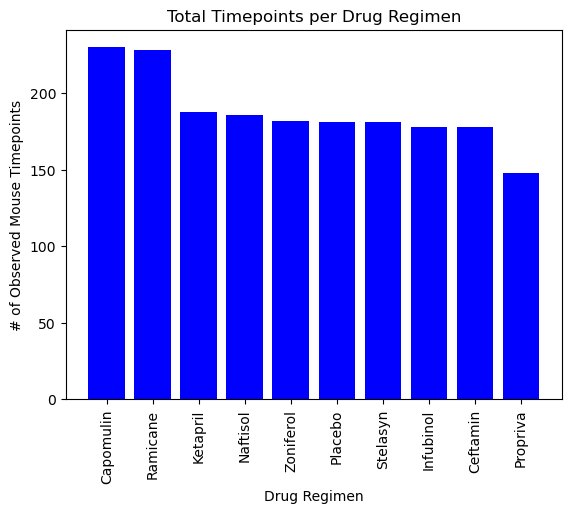

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Use value count to find the number for each Drug Regimen
regimen_bar = pymaceuticals_clean['Drug Regimen'].value_counts()

x_axis = regimen_bar.index.values
y_axis = regimen_bar.values

#x_axis = np.arange(len(pymaceuticals_clean))
#tick_locations = [value for value in x_axis]

plt.bar(x_axis,y_axis, color='b', alpha=1.0, align="center")
plt.xticks(rotation ='vertical')

plt.title ('Total Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

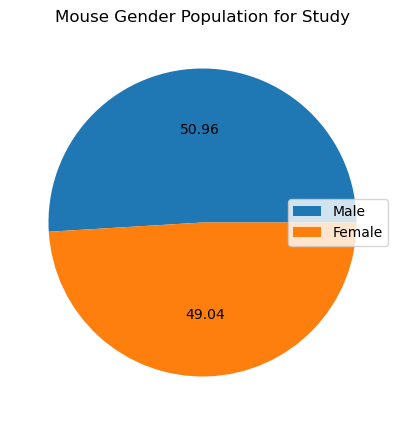

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

my_labels = ['Male', 'Female']
ax = pymaceuticals_clean['Sex'].value_counts().plot(kind='pie', figsize=(5,5), autopct=autopct, labels=None)

ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

plt.title('Mouse Gender Population for Study')
plt.show()

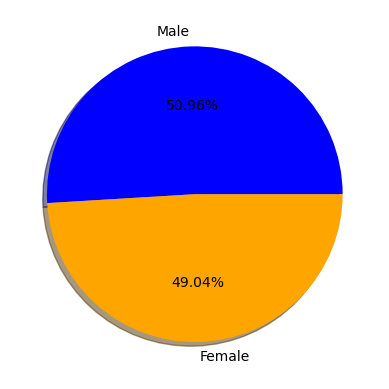

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = pymaceuticals_clean['Sex'].value_counts()
#print(sex)

labels = ["Male", "Female"]

# The values of each section of the pie chart
#Sizes were found using the print statement from the first step print(sex)
sizes = [958,922]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%0.2f%%", shadow=True)


plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint = pymaceuticals_clean.groupby(['Mouse ID']).agg(
    Timepoint=('Timepoint', 'max')).reset_index()
print(timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_volume = timepoint.merge(pymaceuticals_clean, how='left', on=['Mouse ID', 'Timepoint'])
last_timepoint_volume

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


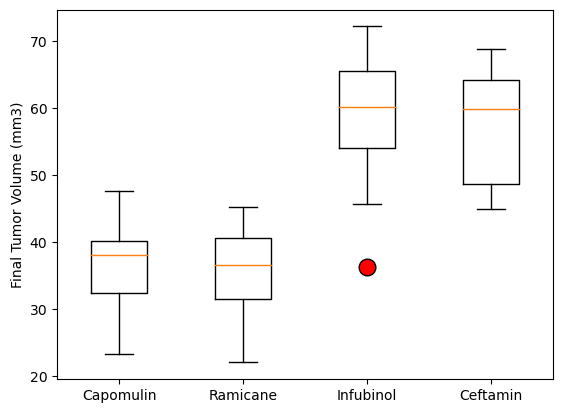

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

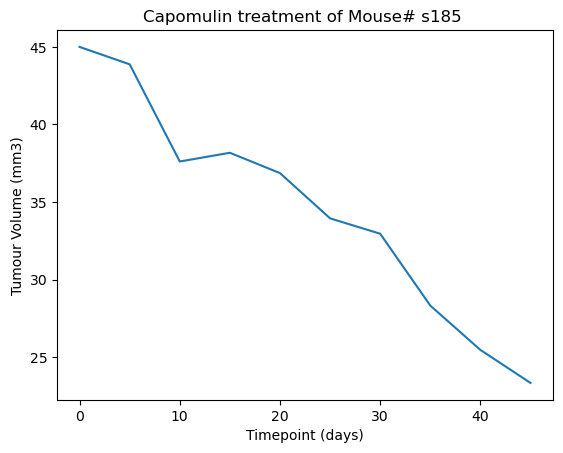

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Capomulin
capomulin_line = pymaceuticals_clean.loc[pymaceuticals_clean['Drug Regimen'] == 'Capomulin']
print(capomulin_line)
#Mice examples treated with Capomulin s185,i557,r157

#specific capomulin data for Mouses185
mouses185 = capomulin_line.loc[capomulin_line['Mouse ID']== 's185']
print(mouses185)

#Line graph 
plt.plot(mouses185['Timepoint'], mouses185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumour Volume (mm3)')
plt.title('Capomulin treatment of Mouse# s185 ')
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_5636\4069674400.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouseweight = capomulin_line.groupby(['Mouse ID']).mean()


          Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Mouse ID                                                          
b128             9.0        22.0       22.5           41.963636   
b742             7.0        21.0       22.5           40.083699   
f966            16.0        17.0       10.0           36.505973   
g288             3.0        19.0       22.5           41.990097   
g316            22.0        22.0       22.5           44.613344   
i557             1.0        24.0       22.5           44.805810   
i738            23.0        20.0       22.5           39.141053   
j119             7.0        23.0       22.5           44.465236   
j246            21.0        21.0       17.5           43.216925   
l509            17.0        21.0       22.5           44.434474   
l897            17.0        19.0       22.5           42.507261   
m601            22.0        17.0       22.5           34.847470   
m957             3.0        19.0       22.5           39.04981

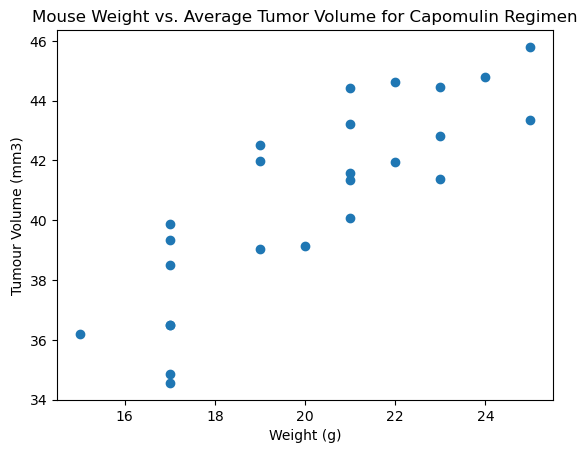

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Capomulin

#Isolate clean dataset for Capomulin
capomulin_line = pymaceuticals_clean.loc[pymaceuticals_clean['Drug Regimen'] == 'Capomulin']
capomulin_line

#Calculate mean data for mouse ids with Capomulin
mouseweight = capomulin_line.groupby(['Mouse ID']).mean()
print(mouseweight)

#Scatter plot for Weight and Tumor Volume
plt.scatter(mouseweight['Weight (g)'], mouseweight['Tumor Volume (mm3)'])

#Scatter plot labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


C:\Users\justi\AppData\Local\Temp\ipykernel_5636\3261818250.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mouseweight = capomulin_line.groupby(['Mouse ID']).mean()


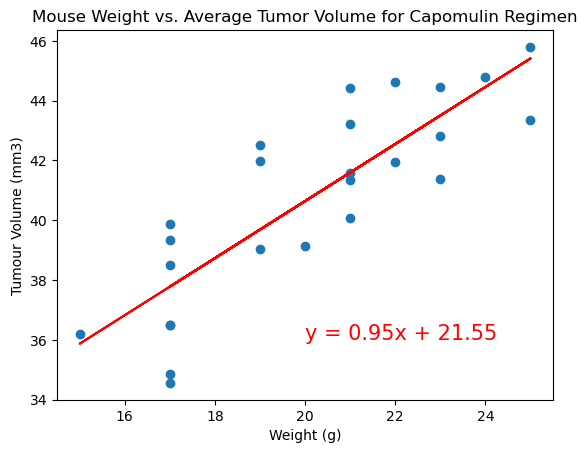

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Example pulled for correlation calculation. Does not however get mean numbers.
#tumor = pymaceuticals_clean.iloc[:,6]
#print(tumor)
#weight = pymaceuticals_clean.iloc[:,4]
#correlation = st.pearsonr(tumor,weight)

#Calculate correlation using mean data
correlation=st.pearsonr(mouseweight['Weight (g)'],mouseweight['Tumor Volume (mm3)'])
#print(corr)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Isolate clean dataset for Capomulin
capomulin_line = pymaceuticals_clean.loc[pymaceuticals_clean['Drug Regimen'] == 'Capomulin']
capomulin_line

#Calculate mean data for mouse ids with Capomulin
mouseweight = capomulin_line.groupby(['Mouse ID']).mean()
#print(mouseweight)

x_values = mouseweight['Weight (g)']
y_values = mouseweight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.show()
